In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)

In [4]:
day  = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

**Dataset characteristics**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv 
- instant: record index 
- dteday : date 
- season : season (1:springer, 2:summer, 3:fall, 4:winter) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not (extracted from 				http://dchr.dc.gov/page/holiday-schedule) 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light 		Rain + Scattered clouds 
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are divided to 41 (max) 
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
- cnt: count of total rental bikes including both casual and registered 


In [5]:
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 0.34417 0.36362 0.80583    0.16045     331         654   985  
1           2 0.36348 0.35374 0.69609    0.24854     131         670   801  
2           1 0.19636 0.18940 0.43727    0.24831     120        1229  1349  
3           1 0.20000 0.21212 0.59044    0.16030     108        1454  1562  
4           1 0.22696 0.22927 0.43696    0.18690      82        1518  1600

In [6]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit    temp   atemp     hum  windspeed  casual  registered  cnt  
0           1 0.24000 0.28790 0.81000    0.00000       3          13   16  
1           1 0.22000 0.27270 0.80000    0.00000       8          32   40  
2           1 0.22000 0.27270 0.80000    0.00000       5          27   32  
3           1 0.24000 0.28790 0.75000    0.00000       3          10   13  
4           1 0.24000 0.28790 0.75000    0.00000       0           1    1

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
day['temp'] = day['temp']*41
hour['temp'] = hour['temp']*41

day['atemp'] = day['atemp']*50
hour['atemp'] = hour['atemp']*50

day['hum'] = day['hum']*100
hour['hum'] = hour['hum']*100

day['windspeed'] = day['windspeed']*67
hour['windspeed'] = hour['windspeed']*67

In [10]:
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit     temp    atemp      hum  windspeed  casual  registered   cnt  
0           2 14.11085 18.18125 80.58330   10.74988     331         654   985  
1           2 14.90260 17.68695 69.60870   16.65211     131         670   801  
2           1  8.05092  9.47025 43.72730   16.63670     120        1229  1349  
3           1  8.20000 10.60610 59.04350   10.73983     108        1454  1562  
4           1  9.30524 11.46350 43.69570   12.52230      82        1518  1600

In [11]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit    temp    atemp      hum  windspeed  casual  registered  cnt  
0           1 9.84000 14.39500 81.00000    0.00000       3          13   16  
1           1 9.02000 13.63500 80.00000    0.00000       8          32   40  
2           1 9.02000 13.63500 80.00000    0.00000       5          27   32  
3           1 9.84000 14.39500 75.00000    0.00000       3          10   13  
4           1 9.84000 14.39500 75.00000    0.00000       0           1    1

In [12]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
day.describe().T

count       mean        std      min        25%        50%  \
instant    731.00000  366.00000  211.16581  1.00000  183.50000  366.00000   
season     731.00000    2.49658    1.11081  1.00000    2.00000    3.00000   
yr         731.00000    0.50068    0.50034  0.00000    0.00000    1.00000   
mnth       731.00000    6.51984    3.45191  1.00000    4.00000    7.00000   
holiday    731.00000    0.02873    0.16715  0.00000    0.00000    0.00000   
weekday    731.00000    2.99726    2.00479  0.00000    1.00000    3.00000   
workingday 731.00000    0.68399    0.46523  0.00000    0.00000    1.00000   
weathersit 731.00000    1.39535    0.54489  1.00000    1.00000    1.00000   
temp       731.00000   20.31078    7.50509  2.42435   13.82042   20.43165   
atemp      731.00000   23.71770    8.14806  3.95348   16.89213   24.33665   
hum        731.00000   62.78941   14.24291  0.00000   52.00000   62.66670   
windspeed  731.00000   12.76258    5.19236  1.50024    9.04165   12.12533   
casual     731.00000  848.17647  686.62249  2.00000  315.50000  713.00000   
registered 731.00000 3656.17237 1560.25638 20.00000 2497.00000 3662.00000   
cnt        731.00000 4504.34884 1937.21145 22.00000 3152.00000 4548.00000   

                  75%        max  
instant     548.50000  731.00000  
season        3.00000    4.00000  
yr            1.00000    1.00000  
mnth         10.00000   12.00000  
holiday       0.00000    1.00000  
weekday       5.00000    6.00000  
workingday    1.00000    1.00000  
weathersit    2.00000    3.00000  
temp         26.87208   35.32835  
atemp        30.43010   42.04480  
hum          73.02085   97.25000  
windspeed    15.62537   34.00002  
casual     1096.00000 3410.00000  
registered 4776.50000 6946.00000  
cnt        5956.00000 8714.00000

In [15]:
hour.describe().T

count       mean        std     min        25%        50%  \
instant    17379.00000 8690.00000 5017.02950 1.00000 4345.50000 8690.00000   
season     17379.00000    2.50164    1.10692 1.00000    2.00000    3.00000   
yr         17379.00000    0.50256    0.50001 0.00000    0.00000    1.00000   
mnth       17379.00000    6.53778    3.43878 1.00000    4.00000    7.00000   
hr         17379.00000   11.54675    6.91441 0.00000    6.00000   12.00000   
holiday    17379.00000    0.02877    0.16717 0.00000    0.00000    0.00000   
weekday    17379.00000    3.00368    2.00577 0.00000    1.00000    3.00000   
workingday 17379.00000    0.68272    0.46543 0.00000    0.00000    1.00000   
weathersit 17379.00000    1.42528    0.63936 1.00000    1.00000    1.00000   
temp       17379.00000   20.37647    7.89480 0.82000   13.94000   20.50000   
atemp      17379.00000   23.78876    8.59251 0.00000   16.66500   24.24000   
hum        17379.00000   62.72288   19.29298 0.00000   48.00000   63.00000   
windspeed  17379.00000   12.73654    8.19680 0.00000    7.00150   12.99800   
casual     17379.00000   35.67622   49.30503 0.00000    4.00000   17.00000   
registered 17379.00000  153.78687  151.35729 0.00000   34.00000  115.00000   
cnt        17379.00000  189.46309  181.38760 1.00000   40.00000  142.00000   

                   75%         max  
instant    13034.50000 17379.00000  
season         3.00000     4.00000  
yr             1.00000     1.00000  
mnth          10.00000    12.00000  
hr            18.00000    23.00000  
holiday        0.00000     1.00000  
weekday        5.00000     6.00000  
workingday     1.00000     1.00000  
weathersit     2.00000     4.00000  
temp          27.06000    41.00000  
atemp         31.06000    50.00000  
hum           78.00000   100.00000  
windspeed     16.99790    56.99690  
casual        48.00000   367.00000  
registered   220.00000   886.00000  
cnt          281.00000   977.00000

In [16]:
col = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

In [17]:
def change_dtype(data,col):
    for i in col:
        if i in data.columns.to_list():
            data[i]=data[i].astype('category')

In [18]:
change_dtype(day, col)
change_dtype(hour, col)

In [19]:
day.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [20]:
hour.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [21]:
for i in col:
    print("Name of {} col".format(i))
    print("No. of NUnique", hour[i].nunique())
    print("Unique Values", hour[i].unique())
    print('*'*30)
    print()
    print()

Name of season col
No. of NUnique 4
Unique Values [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
******************************


Name of yr col
No. of NUnique 2
Unique Values [0, 1]
Categories (2, int64): [0, 1]
******************************


Name of mnth col
No. of NUnique 12
Unique Values [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
******************************


Name of hr col
No. of NUnique 24
Unique Values [0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]
******************************


Name of holiday col
No. of NUnique 2
Unique Values [0, 1]
Categories (2, int64): [0, 1]
******************************


Name of weekday col
No. of NUnique 7
Unique Values [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]
******************************


Name of workingday col
No. of NUnique 2
Unique Values [0, 1]
Categories (2, int64): [0, 1]
**********

In [22]:
def drop_instant(data):
    data.drop(['instant'], axis=1, inplace=True)
drop_instant(day)
drop_instant(hour)     

In [23]:
day.head()

dteday season yr mnth holiday weekday workingday weathersit     temp  \
0  2011-01-01      1  0    1       0       6          0          2 14.11085   
1  2011-01-02      1  0    1       0       0          0          2 14.90260   
2  2011-01-03      1  0    1       0       1          1          1  8.05092   
3  2011-01-04      1  0    1       0       2          1          1  8.20000   
4  2011-01-05      1  0    1       0       3          1          1  9.30524   

     atemp      hum  windspeed  casual  registered   cnt  
0 18.18125 80.58330   10.74988     331         654   985  
1 17.68695 69.60870   16.65211     131         670   801  
2  9.47025 43.72730   16.63670     120        1229  1349  
3 10.60610 59.04350   10.73983     108        1454  1562  
4 11.46350 43.69570   12.52230      82        1518  1600

In [24]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      731 non-null    object  
 1   season      731 non-null    category
 2   yr          731 non-null    category
 3   mnth        731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    category
 7   weathersit  731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(3), object(1)
memory usage: 52.2+ KB


In [25]:
sns.set_style('darkgrid')

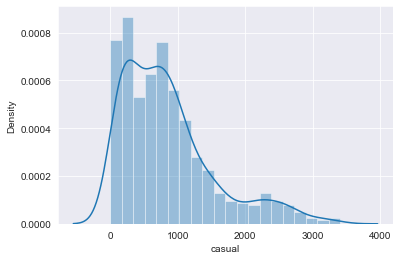

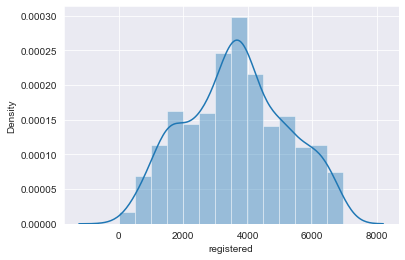

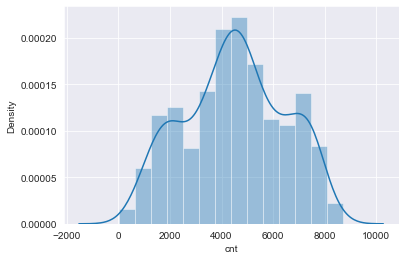

In [26]:
for i in day.select_dtypes(include='int64'):
    sns.distplot(day[i])
    plt.show()

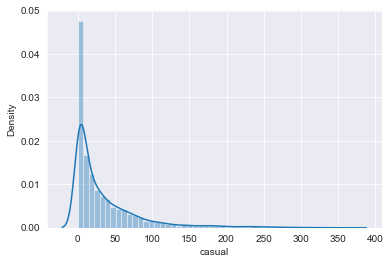

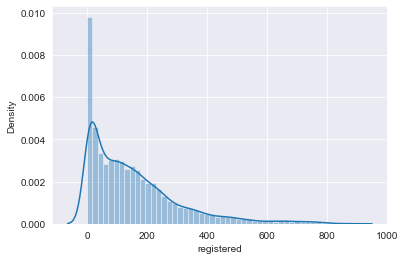

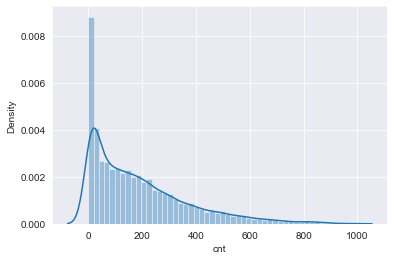

In [27]:
for i in hour.select_dtypes(include='int64'):
    sns.distplot(hour[i])
    plt.show()

In [28]:
day.casual.describe()

count    731.00000
mean     848.17647
std      686.62249
min        2.00000
25%      315.50000
50%      713.00000
75%     1096.00000
max     3410.00000
Name: casual, dtype: float64

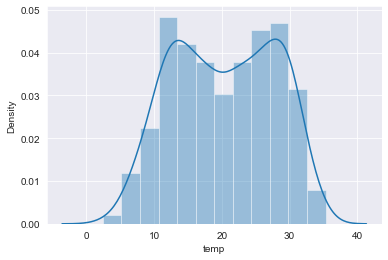

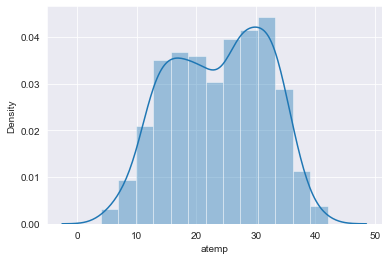

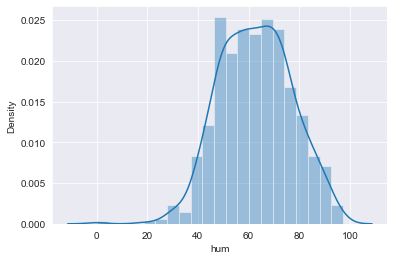

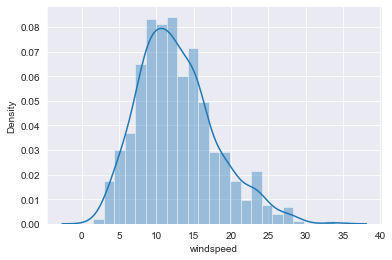

In [29]:
for i in day.select_dtypes(include='float'):
    sns.distplot(day[i])
    plt.show()

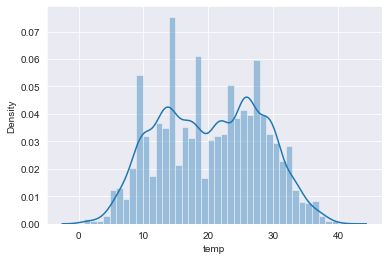

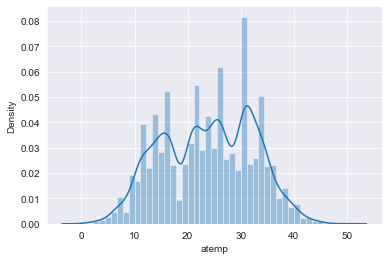

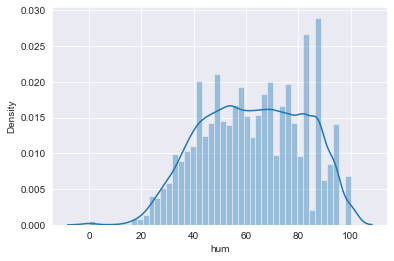

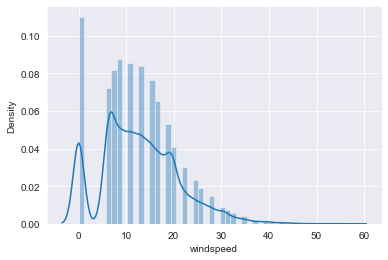

In [30]:
for i in hour.select_dtypes(include='float'):
    sns.distplot(hour[i])
    plt.show()

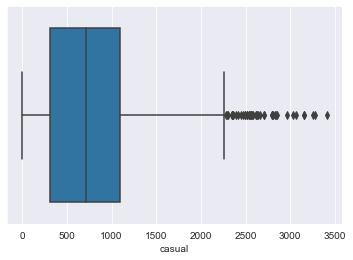

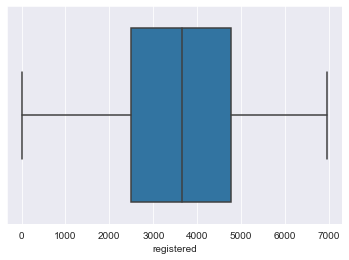

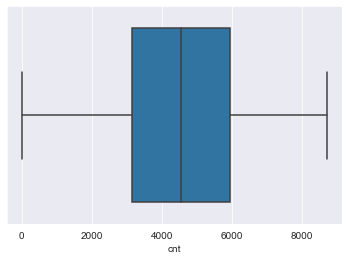

In [31]:
for i in day. select_dtypes(include='int64') :
    sns.boxplot(day[i])
    plt.show()

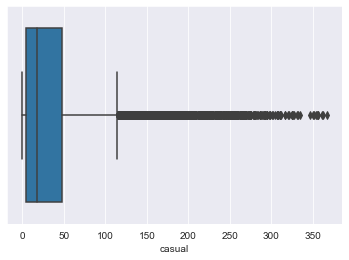

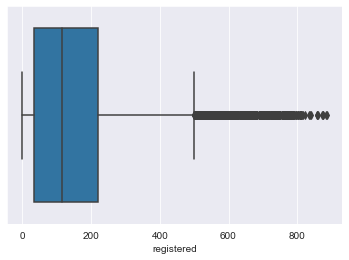

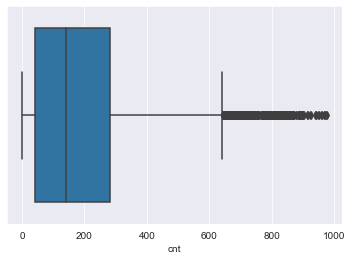

In [32]:
for i in hour.select_dtypes(include='int64'):
    sns.boxplot(hour[i])
    plt.show()

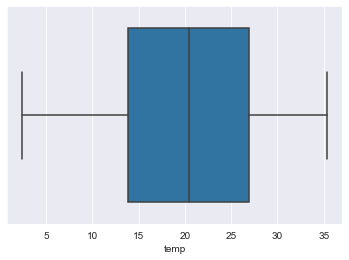

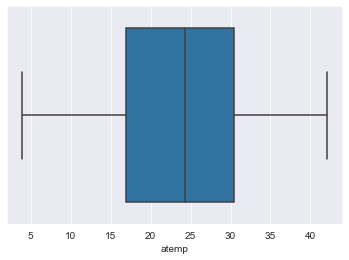

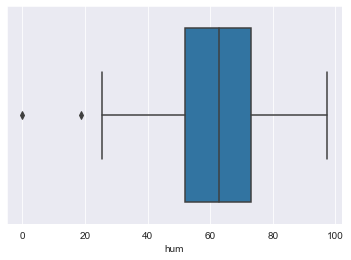

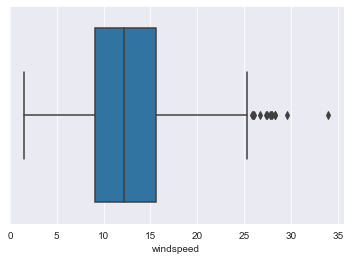

In [33]:
for i in day.select_dtypes(include='float'):
    sns.boxplot(day[i])
    plt.show()

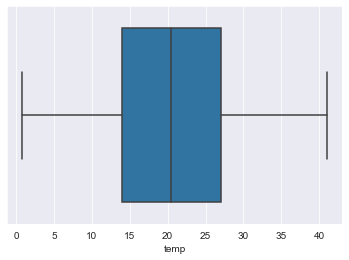

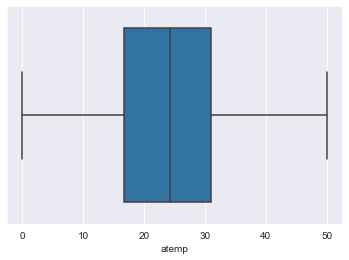

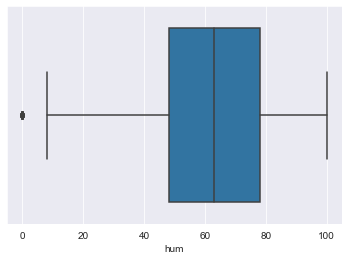

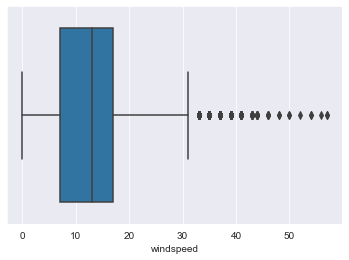

In [34]:
for i in hour.select_dtypes(include='float'):
    sns.boxplot(hour[i])
    plt.show()

<AxesSubplot:>

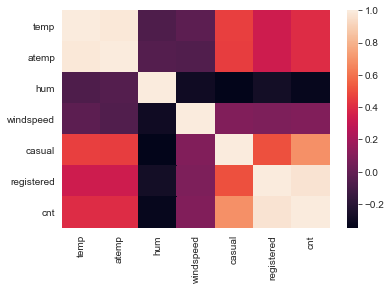

In [35]:
sns.heatmap(hour.corr())

<AxesSubplot:>

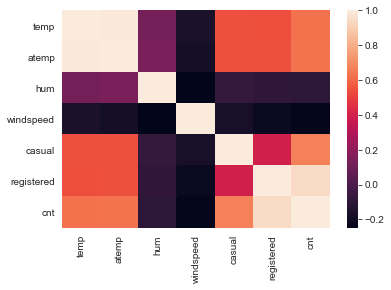

In [36]:
sns.heatmap(day.corr())

In [37]:
day.corr()['cnt']

temp          0.62749
atemp         0.63107
hum          -0.10066
windspeed    -0.23454
casual        0.67280
registered    0.94552
cnt           1.00000
Name: cnt, dtype: float64

In [38]:
hour.corr()['cnt']

temp          0.40477
atemp         0.40093
hum          -0.32291
windspeed     0.09323
casual        0.69456
registered    0.97215
cnt           1.00000
Name: cnt, dtype: float64

In [39]:
day.head()

dteday season yr mnth holiday weekday workingday weathersit     temp  \
0  2011-01-01      1  0    1       0       6          0          2 14.11085   
1  2011-01-02      1  0    1       0       0          0          2 14.90260   
2  2011-01-03      1  0    1       0       1          1          1  8.05092   
3  2011-01-04      1  0    1       0       2          1          1  8.20000   
4  2011-01-05      1  0    1       0       3          1          1  9.30524   

     atemp      hum  windspeed  casual  registered   cnt  
0 18.18125 80.58330   10.74988     331         654   985  
1 17.68695 69.60870   16.65211     131         670   801  
2  9.47025 43.72730   16.63670     120        1229  1349  
3 10.60610 59.04350   10.73983     108        1454  1562  
4 11.46350 43.69570   12.52230      82        1518  1600

In [40]:
def get_df_name(df):
    # This function returns the name of the dataset
    name = [x for x in globals() if globals()[x] is df][0]
    return name

def plot_stack_bar_chart(data, col, name):
    plt.figure(figsize=(12,8))
    p1 = plt.bar(data[col].unique(), data.groupby([col])['casual'].sum())
    p2 = plt.bar(data[col].unique(), data.groupby([col])['casual'].sum(), bottom=data.groupby([col])['casual'].sum())
    plt.ylabel('Count')
    plt.title("Count by Casual and Registeredfor each {} in {} Data".format(col,get_df_name(data)))
    plt.xticks(data[col].unique(), name)
    plt.legend((p1[0], p2[0]), ('Casual', 'Registered'))
    plt.show()

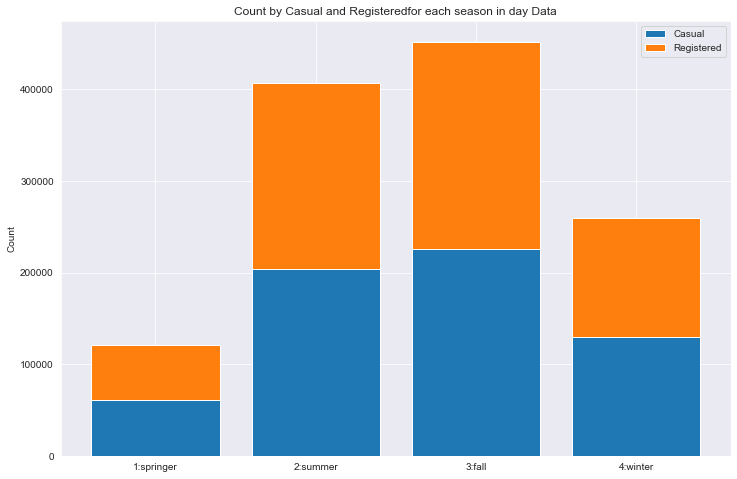

In [41]:
plot_stack_bar_chart(day ,'season', ('1:springer', '2:summer','3:fall', '4:winter'))

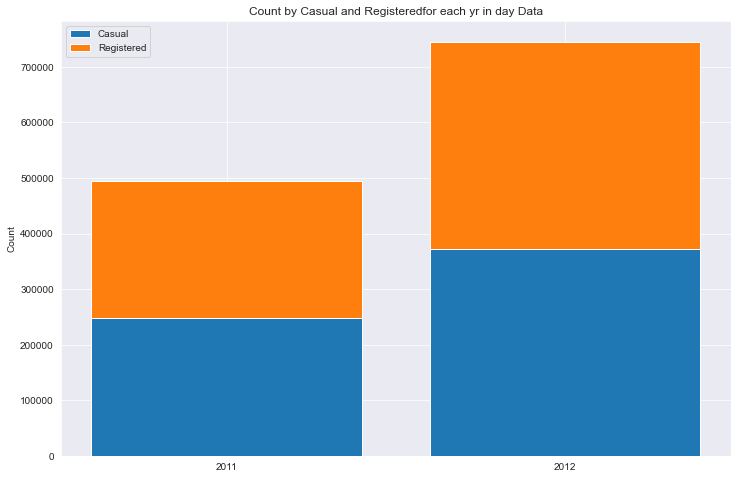

In [42]:
plot_stack_bar_chart(day,'yr',('2011','2012'))

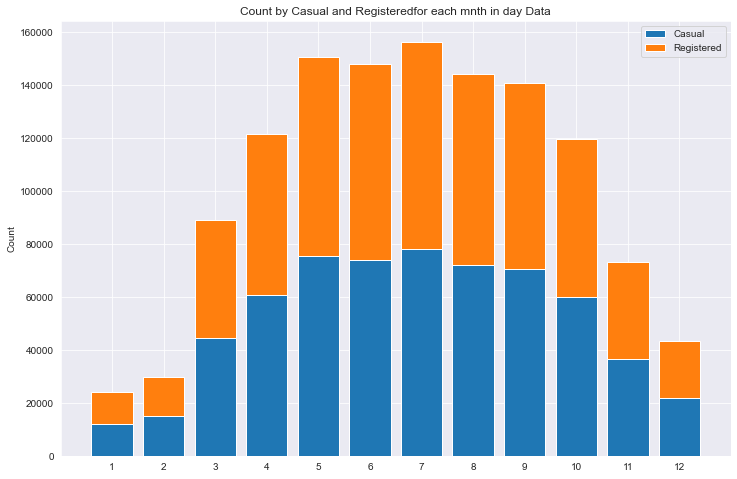

In [43]:
plot_stack_bar_chart(day,'mnth',[str(i) for i in day['mnth'].unique()])

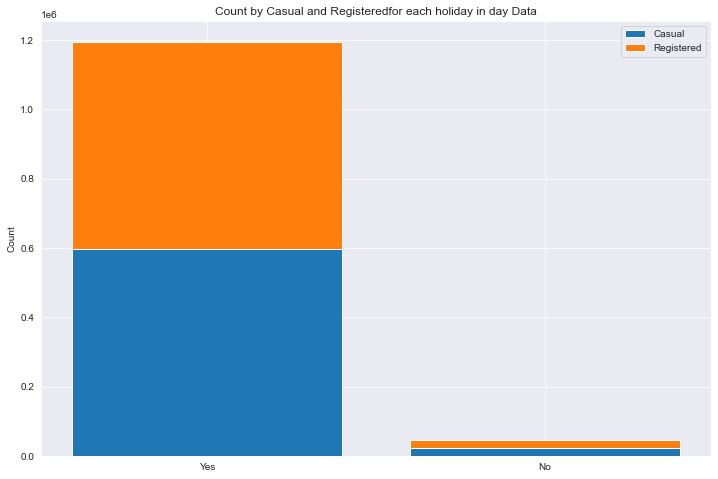

In [44]:
plot_stack_bar_chart(day,'holiday',('Yes','No'))

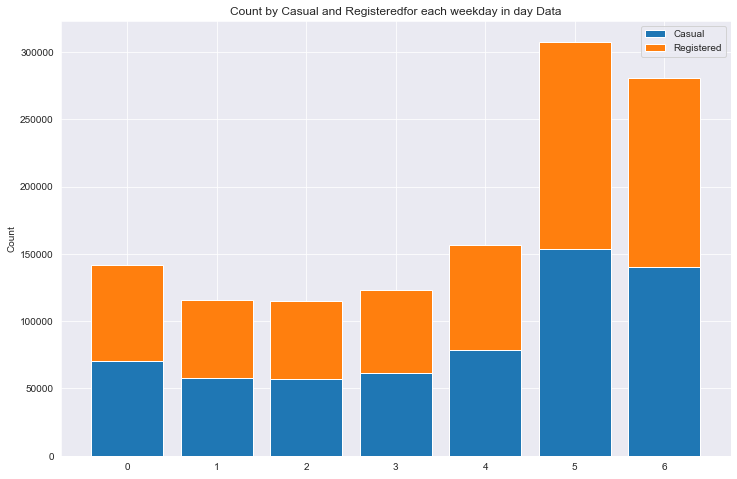

In [45]:
plot_stack_bar_chart(day,'weekday',[str(i) for i in day['weekday'].unique()])

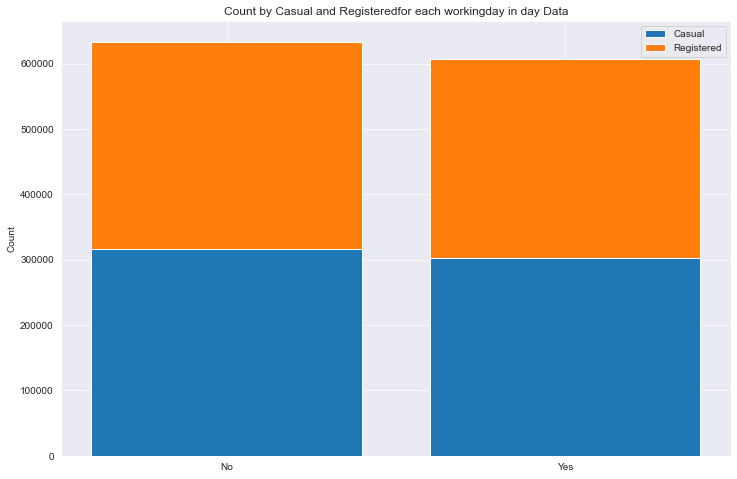

In [46]:
plot_stack_bar_chart(day,'workingday',{'Yes','No'})

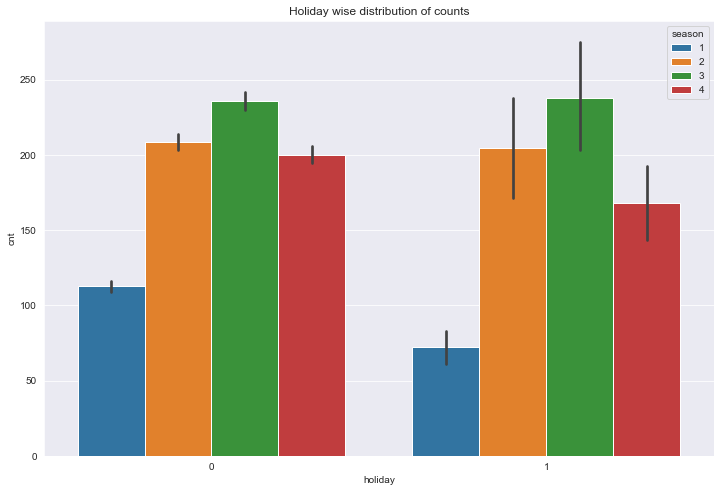

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x = hour['holiday'], y = hour['cnt'], hue = hour['season'])
plt.title('Holiday wise distribution of counts')
plt.show()

## 4b.
### Do the following
Data set : https://www.kaggle.com/ramendrapandey/nhanes-2015-2016
### VARIABLE DICTIONARY
https://wwwn.cdc.gov/nchs/nhanes/2013-2014/demo_h.htm

In [49]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
nhanes.head()

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732 1.00000     nan 1.00000       1         1        62         3   
1  83733 1.00000     nan 6.00000       1         1        53         3   
2  83734 1.00000     nan     nan       1         1        78         3   
3  83735 2.00000 1.00000 1.00000       2         2        56         3   
4  83736 2.00000 1.00000 1.00000       2         2        42         4   

   DMDCITZN  DMDEDUC2  DMDMARTL  DMDHHSIZ     WTINT2YR  SDMVPSU  SDMVSTRA  \
0   1.00000   5.00000   1.00000         2 134671.37000        1       125   
1   2.00000   3.00000   3.00000         1  24328.56000        1       125   
2   1.00000   3.00000   1.00000         2  12400.01000        1       131   
3   1.00000   5.00000   6.00000         1 102718.00000        1       131   
4   1.00000   4.00000   3.00000         5  17627.67000        2       126   

   INDFMPIR    BPXSY1   BPXDI1    BPXSY2   BPXDI2     BMXWT     BMXHT  \
0   4.39000 128.00000 70.00000 124.00000 64.00000  94.80000 184.50000   
1   1.32000 146.00000 88.00000 140.00000 88.00000  90.40000 171.40000   
2   1.51000 138.00000 46.00000 132.00000 44.00000  83.40000 170.10000   
3   5.00000 132.00000 72.00000 134.00000 68.00000 109.80000 160.90000   
4   1.23000 100.00000 70.00000 114.00000 54.00000  55.20000 164.90000   

    BMXBMI   BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  
0 27.80000 43.30000 43.60000 35.90000 101.10000 2.00000  
1 30.80000 38.00000 40.00000 33.20000 107.90000     nan  
2 28.80000 35.60000 37.00000 31.00000 116.50000 2.00000  
3 42.40000 38.50000 37.70000 38.30000 110.10000 2.00000  
4 20.30000 37.40000 36.00000 27.20000  80.40000 2.00000

In [50]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [51]:
nhanes.isna().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [52]:
nhanes.fillna(0)

SEQN  ALQ101  ALQ110    ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0     83732 1.00000 0.00000   1.00000       1         1        62         3   
1     83733 1.00000 0.00000   6.00000       1         1        53         3   
2     83734 1.00000 0.00000   0.00000       1         1        78         3   
3     83735 2.00000 1.00000   1.00000       2         2        56         3   
4     83736 2.00000 1.00000   1.00000       2         2        42         4   
5     83737 2.00000 2.00000   0.00000       2         2        72         1   
6     83741 1.00000 0.00000   8.00000       1         1        22         4   
7     83742 1.00000 0.00000   1.00000       2         2        32         1   
8     83743 0.00000 0.00000   0.00000       2         1        18         5   
9     83744 1.00000 0.00000   0.00000       2         1        56         4   
10    83747 1.00000 0.00000   1.00000       1         1        46         3   
11    83750 1.00000 0.00000   3.00000       1         1        45         5   
12    83752 1.00000 0.00000   2.00000       1         2        30         2   
13    83754 2.00000 1.00000   1.00000       2         2        67         2   
14    83755 1.00000 0.00000   3.00000       2         1        67         4   
15    83757 1.00000 0.00000   1.00000       2         2        57         2   
16    83759 2.00000 2.00000   0.00000       2         2        19         1   
17    83761 1.00000 0.00000   1.00000       2         2        24         5   
18    83762 0.00000 0.00000   0.00000       1         2        27         4   
19    83767 2.00000 2.00000   0.00000       2         2        54         5   
20    83769 1.00000 0.00000   2.00000       2         1        49         5   
21    83773 2.00000 2.00000   0.00000       2         2        80         3   
22    83775 2.00000 1.00000   0.00000       1         2        69         2   
23    83776 0.00000 0.00000   0.00000       2         2        58         1   
24    83777 2.00000 2.00000   0.00000       2         1        56         5   
25    83781 1.00000 0.00000   3.00000       2         2        27         4   
26    83784 1.00000 0.00000   4.00000       1         1        22         2   
27    83785 2.00000 1.00000   1.00000       1         2        60         2   
28    83786 0.00000 0.00000   0.00000       2         1        51         4   
29    83787 2.00000 2.00000   0.00000       2         2        68         1   
30    83788 2.00000 1.00000   1.00000       1         2        69         3   
31    83789 1.00000 0.00000   1.00000       2         1        66         3   
32    83790 2.00000 1.00000   0.00000       1         1        56         3   
33    83791 2.00000 2.00000   0.00000       2         2        80         3   
34    83799 0.00000 0.00000   0.00000       2         2        37         2   
35    83801 1.00000 0.00000   1.00000       1         2        80         3   
36    83802 0.00000 0.00000   0.00000       2         2        29         1   
37    83803 0.00000 0.00000   0.00000       2         1        27         4   
38    83809 2.00000 2.00000   0.00000       2         2        20         4   
39    83812 1.00000 0.00000   2.00000       2         2        68         1   
40    83813 1.00000 0.00000   2.00000       1         1        24         3   
41    83816 1.00000 0.00000   2.00000       2         1        27         3   
42    83817 1.00000 0.00000   1.00000       2         1        42         3   
43    83818 1.00000 0.00000   0.00000       2         2        80         2   
44    83820 1.00000 0.00000   2.00000       1         1        70         3   
45    83821 1.00000 0.00000   0.00000       1         1        80         3   
46    83822 2.00000 2.00000   0.00000       2         2        20         4   
47    83823 0.00000 0.00000   0.00000       2         2        29         1   
48    83824 0.00000 0.00000   0.00000       2         1        23         5   
49    83827 1.00000 0.00000   0.00000       1         1  

In [53]:
for i in nhanes.columns.to_list():
    print(i,nhanes[i].unique())

SEQN [83732 83733 83734 ... 93697 93700 93702]
ALQ101 [ 1.  2. nan  9.]
ALQ110 [nan  1.  2.  9.  7.]
ALQ130 [  1.   6.  nan   8.   3.   2.   4.  12.   5.  10.  14.  15.   7.   9.
 999.  11.]
SMQ020 [1 2 7 9]
RIAGENDR [1 2]
RIDAGEYR [62 53 78 56 42 72 22 32 18 46 45 30 67 57 19 24 27 54 49 80 69 58 60 51
 68 66 37 29 20 70 23 61 39 50 44 71 31 41 35 21 40 48 63 79 38 74 26 55
 52 47 43 75 33 28 65 25 73 36 64 59 77 76 34]
RIDRETH1 [3 4 1 5 2]
DMDCITZN [ 1.  2.  9.  7. nan]
DMDEDUC2 [ 5.  3.  4.  2. nan  1.  9.]
DMDMARTL [ 1.  3.  6.  4.  5. nan  2. 77.]
DMDHHSIZ [2 1 5 3 4 7 6]
WTINT2YR [134671.37  24328.56  12400.01 ...   9611.19 122920.6   42314.29]
SDMVPSU [1 2]
SDMVSTRA [125 131 126 128 122 121 124 120 119 132 133 129 123 130 127]
INDFMPIR [4.39 1.32 1.51 5.   1.23 2.82 2.08 1.03 1.19 0.75 1.36 0.89 2.04 0.77
 1.74 0.   2.12 2.99 2.97 3.57 0.55 3.72 1.35  nan 1.49 1.79 1.   4.18
 2.36 3.3  2.89 4.22 0.84 1.62 0.35 0.49 1.41 0.97 2.76 2.18 1.5  1.34
 1.86 2.39 1.9  2.64 2.14 4.36 2.2

**1.line**

<AxesSubplot:xlabel='BMXWT', ylabel='BMXHT'>

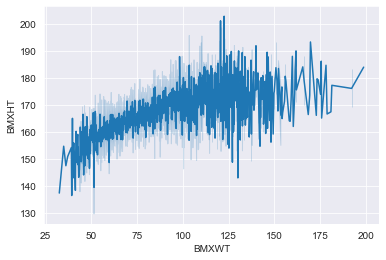

In [54]:
sns.lineplot(nhanes['BMXWT'],nhanes['BMXHT'])

**2.area**

<AxesSubplot:>

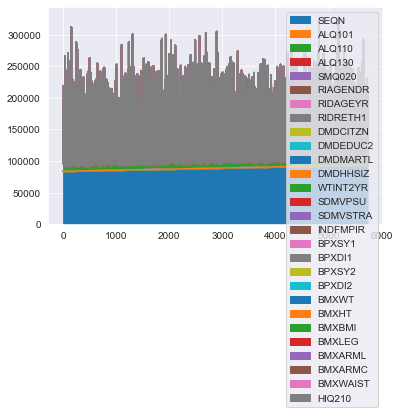

In [55]:
nhanes.plot.area()

**3.bar**

<AxesSubplot:xlabel='BMXWT', ylabel='BMXHT'>

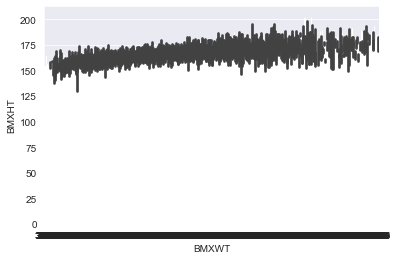

In [56]:
sns.barplot(nhanes['BMXWT'],nhanes['BMXHT'])

**4.barh**

<AxesSubplot:>

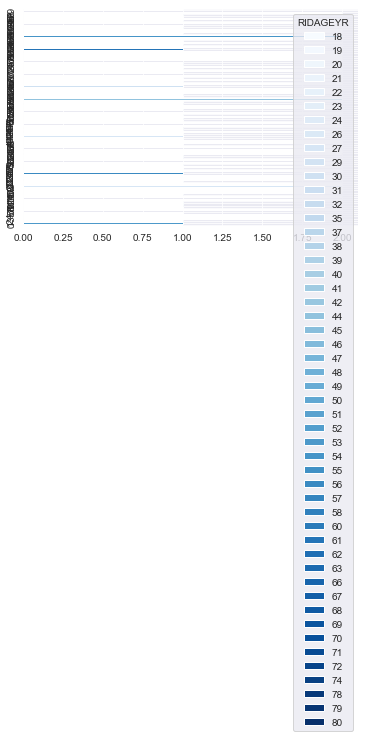

In [59]:
nhanes.pivot(columns='RIDAGEYR',values='RIAGENDR').plot(kind='barh',stacked=True,colormap='Blues',rot=90) 

**5.pie**

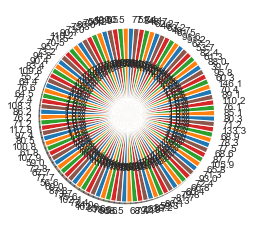

In [60]:
d1 = nhanes["SEQN"]   
d2 = nhanes["BMXWT"]                      
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]    

plt.pie(d1 , labels=d2 , colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

<AxesSubplot:ylabel='HIQ210'>

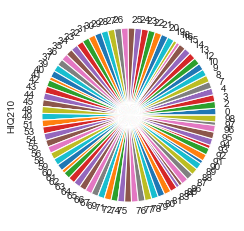

In [61]:
nhanes['HIQ210'].plot.pie() 

**6.box**

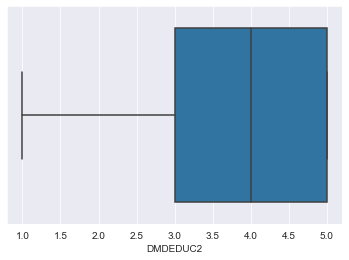

In [62]:
sns.boxplot(nhanes['DMDEDUC2'])
plt.show()

**7.hexbin**

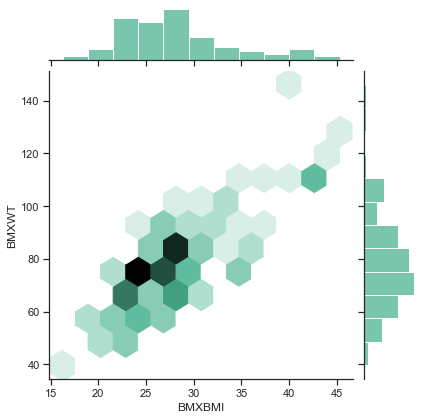

In [63]:
sns.set_theme(style="ticks")
sns.jointplot(x=nhanes['BMXBMI'], y=nhanes['BMXWT'], kind="hex", color="#4CB391")

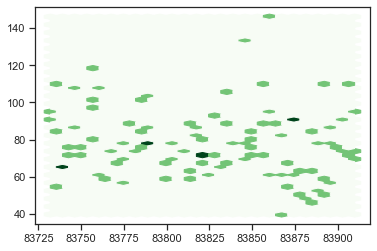

In [64]:
plt.hexbin(nhanes["SEQN"], nhanes["BMXWT"], gridsize=(25,25), cmap=plt.cm.Greens)
plt.show()

**8.hist**

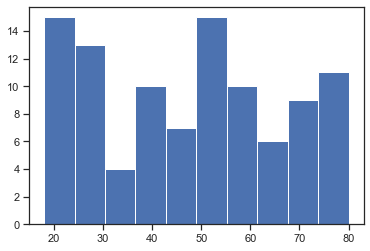

In [65]:
plt.hist(nhanes['RIDAGEYR'])
plt.show()

array([[<AxesSubplot:title={'center':'SEQN'}>,
        <AxesSubplot:title={'center':'ALQ101'}>,
        <AxesSubplot:title={'center':'ALQ110'}>,
        <AxesSubplot:title={'center':'ALQ130'}>,
        <AxesSubplot:title={'center':'SMQ020'}>],
       [<AxesSubplot:title={'center':'RIAGENDR'}>,
        <AxesSubplot:title={'center':'RIDAGEYR'}>,
        <AxesSubplot:title={'center':'RIDRETH1'}>,
        <AxesSubplot:title={'center':'DMDCITZN'}>,
        <AxesSubplot:title={'center':'DMDEDUC2'}>],
       [<AxesSubplot:title={'center':'DMDMARTL'}>,
        <AxesSubplot:title={'center':'DMDHHSIZ'}>,
        <AxesSubplot:title={'center':'WTINT2YR'}>,
        <AxesSubplot:title={'center':'SDMVPSU'}>,
        <AxesSubplot:title={'center':'SDMVSTRA'}>],
       [<AxesSubplot:title={'center':'INDFMPIR'}>,
        <AxesSubplot:title={'center':'BPXSY1'}>,
        <AxesSubplot:title={'center':'BPXDI1'}>,
        <AxesSubplot:title={'center':'BPXSY2'}>,
        <AxesSubplot:title={'center':'BPXDI2'}>

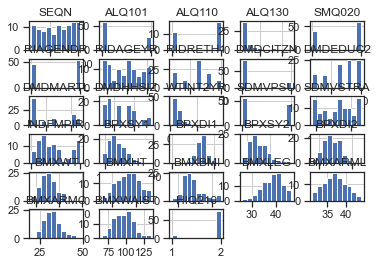

In [66]:
nhanes.hist()

**9.kde**

<AxesSubplot:xlabel='BMXBMI', ylabel='Density'>

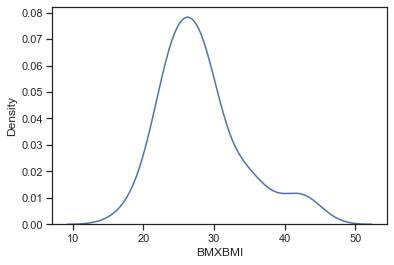

In [67]:
sns.kdeplot(nhanes['BMXBMI'])

**10.density**

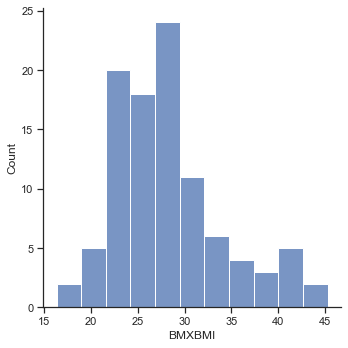

In [68]:
sns.displot(x=nhanes['BMXBMI'])